# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip install citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

621

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url = url + "appid=" + api_key + "&q=" + city

In [19]:
# for city in cities:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
lat = []
lon = []
temp = []
humidity = []
clouds = []
temp_max = []
wind_speed = []
cities_not_found = []

for city in cities:
    response = requests.get(query_url + city).json()
    if 'coord' in response.keys() and 'main' in response.keys():
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    else:
        cities_not_found.append(city)
# print(lat)
# print(temp)
# print(cities_not_found)
cities = [city for city in cities if city not in cities_not_found]
len(cities)

564

In [20]:
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lon": lon,
    "Temp": temp,
    "Humidity": humidity,
    "Clouds": clouds,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data
weather_response = requests.get(query_url)
weather_json = weather_response.json()


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_data.head()

,City,Lat,Lon,Temp,Humidity,Clouds,Max Temp,Wind Speed
0,atuona,-9.80,-139.03,27.12,72,42,27.12,6.05
1,ushuaia,-54.80,-68.30,1.00,86,2,1.00,2.10
2,kalianget,-7.05,113.93,28.90,73,0,28.90,6.22
3,chardara,41.25,67.97,21.13,36,0,21.13,3.27
4,pisco,-13.70,-76.22,16.86,88,3,17.00,4.60


In [41]:
weather_data.dtypes

City         object
Lat         float64
Lon         float64
Temp        float64
Humidity      int64
dtype: object

In [51]:
# check = weather_data.loc[weather_data["Humidity"]>= 100]
# check

In [52]:
# check2 = weather_data.loc[weather_data["Humidity"]> 100]
# check2

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
#  Get the indices of cities that have humidity over 100%.
check2 = weather_data.loc[weather_data["Humidity"]> 100]
check2

,City,Lat,Lon,Temp,Humidity,Clouds,Max Temp,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# N/A

In [23]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#df.to_csv('file_name.csv')
weather_data.to_csv('city_data3.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature Plot 6/9/2020')

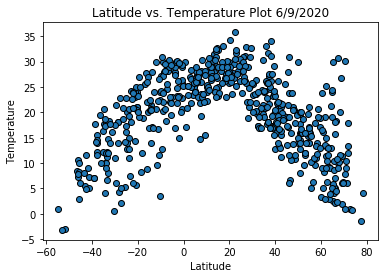

In [16]:
latplot = weather_data["Lat"]
tempplot = weather_data["Temp"]
plt.scatter(latplot, tempplot, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot 6/9/2020")



## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot 6/9/2020')

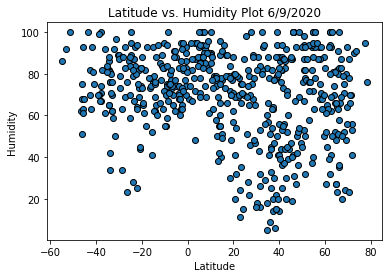

In [17]:
humplot = weather_data["Humidity"]
plt.scatter(latplot, humplot, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot 6/9/2020")


## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Clouds Plot 6/17/2020')

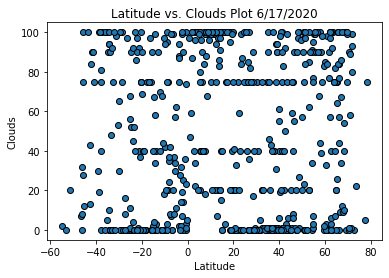

In [18]:
cloudplot = weather_data["Clouds"]
plt.scatter(latplot, cloudplot, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.title("Latitude vs. Clouds Plot 6/17/2020")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed Plot 6/17/2020')

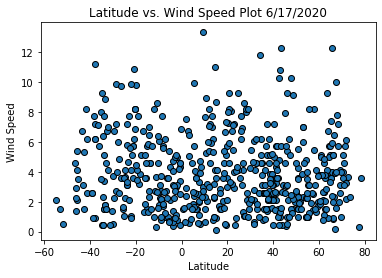

In [25]:
windplot = weather_data["Wind Speed"]
plt.scatter(latplot, windplot, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot 6/17/2020")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
value_slope, value_int, value_r, value_p, value_std_err = linregress(Xvalue, Yvalue)
value_fit = value_slope * variable + value_int
plt.plot(variable, value_fit, "--")

In [33]:
# Create Northern and Southern Hemisphere DataFrames
southern_df = weather_data.loc[weather_data["Lat"]<= -1]
southern_df.head()

,City,Lat,Lon,Temp,Humidity,Clouds,Max Temp,Wind Speed
0,atuona,-9.80,-139.03,27.12,72,42,27.12,6.05
1,ushuaia,-54.80,-68.30,1.00,86,2,1.00,2.10
2,kalianget,-7.05,113.93,28.90,73,0,28.90,6.22
4,pisco,-13.70,-76.22,16.86,88,3,17.00,4.60
6,saldanha,-33.01,17.94,8.00,70,0,8.00,1.50


In [34]:
northern_df = weather_data.loc[weather_data["Lat"]>= 1]
northern_df.head()

,City,Lat,Lon,Temp,Humidity,Clouds,Max Temp,Wind Speed
3,chardara,41.25,67.97,21.13,36,0,21.13,3.27
5,sao filipe,14.90,-24.50,24.97,77,0,24.97,3.58
7,ilulissat,69.22,-51.10,2.00,80,0,2.00,2.60
9,upernavik,72.79,-56.15,0.93,90,0,0.93,3.65
11,jamestown,42.10,-79.24,21.86,56,20,22.00,3.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

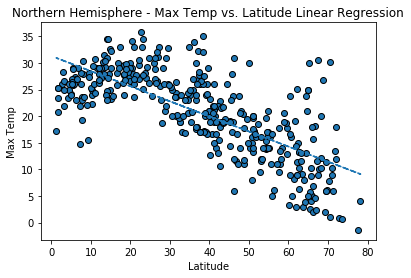

In [41]:
nhlat = northern_df["Lat"]
nhmt = northern_df["Max Temp"]
plt.scatter(nhlat, nhmt, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
n_slope, n_int, n_r, n_p, n_std_err = linregress(nhlat, nhmt)
n_fit = n_slope * nhlat + n_int
plt.plot(nhlat, n_fit, "--")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

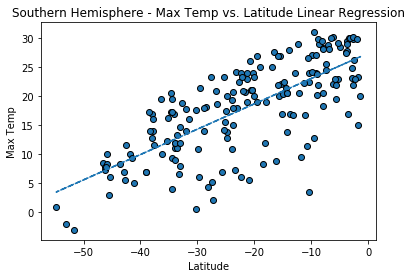

In [43]:
shlat = southern_df["Lat"]
shmt = southern_df["Max Temp"]
plt.scatter(shlat, shmt, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
s_slope, s_int, s_r, s_p, s_std_err = linregress(shlat, shmt)
s_fit = s_slope * shlat + s_int
plt.plot(shlat, s_fit, "--")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

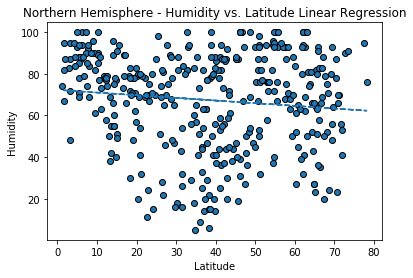

In [44]:
nhh = northern_df["Humidity"]
plt.scatter(nhlat, nhh, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
n_slope, n_int, n_r, n_p, n_std_err = linregress(nhlat, nhh)
n_fit = n_slope * nhlat + n_int
plt.plot(nhlat, n_fit, "--")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

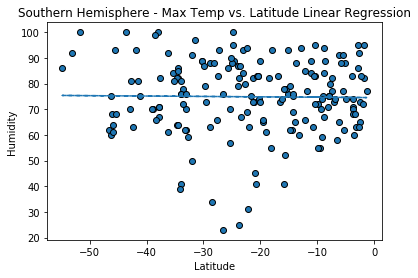

In [45]:
shh = southern_df["Humidity"]
shmt = southern_df["Max Temp"]
plt.scatter(shlat, shh, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
s_slope, s_int, s_r, s_p, s_std_err = linregress(shlat, shh)
s_fit = s_slope * shlat + s_int
plt.plot(shlat, s_fit, "--")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

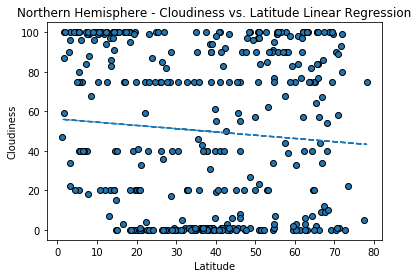

In [46]:
nhc = northern_df["Clouds"]
plt.scatter(nhlat, nhc, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
n_slope, n_int, n_r, n_p, n_std_err = linregress(nhlat, nhc)
n_fit = n_slope * nhlat + n_int
plt.plot(nhlat, n_fit, "--")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

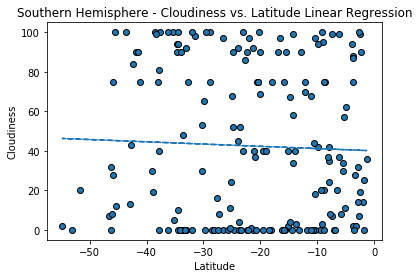

In [47]:
shc = southern_df["Clouds"]
plt.scatter(shlat, shc, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
s_slope, s_int, s_r, s_p, s_std_err = linregress(shlat, shc)
s_fit = s_slope * shlat + s_int
plt.plot(shlat, s_fit, "--")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

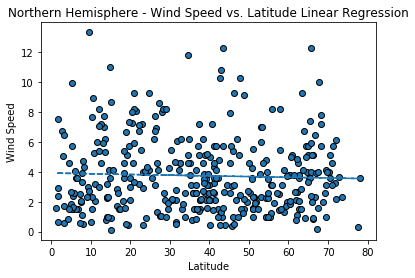

In [48]:
nhws = northern_df["Wind Speed"]
plt.scatter(nhlat, nhws, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
n_slope, n_int, n_r, n_p, n_std_err = linregress(nhlat, nhws)
n_fit = n_slope * nhlat + n_int
plt.plot(nhlat, n_fit, "--")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

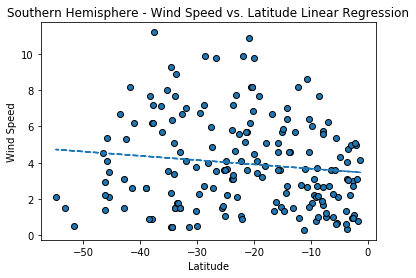

In [49]:
shws = southern_df["Wind Speed"]
plt.scatter(shlat, shws, marker="o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
s_slope, s_int, s_r, s_p, s_std_err = linregress(shlat, shws)
s_fit = s_slope * shlat + s_int
plt.plot(shlat, s_fit, "--")